In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
loaded_efficient_model = tf.keras.models.load_model("/content/drive/MyDrive/efficientnet_model")

In [ ]:
class_names = ['animals',
 'bridges_seas_building',
 'clothes',
 'flowers',
 'food',
 'forest',
 'fruits_vegetables',
 'human',
 'vehicle']

In [ ]:


def class_predictor(image_link, class_names):
    img = tf.io.read_file(image_link)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[224, 224])
    img = img / 255.
    plt.imshow(img)
    plt.axis("off")
    img = tf.expand_dims(img, axis=0)

    prediction = loaded_efficient_model.predict(img)
    prediction = prediction.flatten()
    list_prediction = prediction.tolist()

    def indices_greater_1_percent(list_prediction):
        indices = []
        for i, val in enumerate(list_prediction):
            if val > .013:
                indices.append(i)
        return indices

    indices = indices_greater_1_percent(list_prediction)

    def locating_class(class_names, indices):
        located_elements = []
        for index in indices:
            located_elements.append(class_names[index])
        return located_elements

    classes = locating_class(class_names, indices)
    print(class_names)
    print(list_prediction)
    print(indices)

    return classes


Please enter the addresses and true labels of the images:
Image 1 address: https://previews.123rf.com/images/ontheraks/ontheraks1902/ontheraks190201110/122694243-donkey-eats-food-from-a-vehicle-passenger-of-a-car-in-a-drive-thru-zoo.jpg
Image 1 true labels (comma-separated): animals,human,vehicle,food
Image 2 address: 
Image 2 true labels (comma-separated): human,vehicle,animals
Image 3 address: 
Image 3 true labels (comma-separated): human,vehicle
Image 4 address: 
Image 4 true labels (comma-separated): animals,vehicle
Image 5 address: 
Image 5 true labels (comma-separated): animals,food
1/1 [==============================] - 0s 129ms/step
['animals']

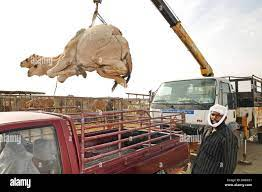
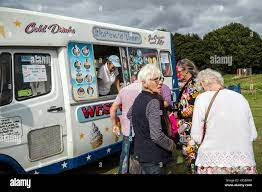
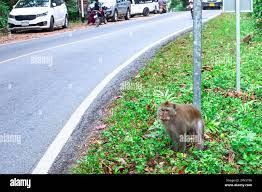
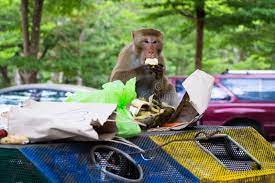

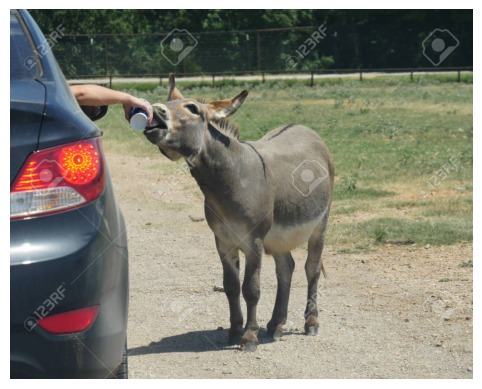

1/1 [==============================] - 0s 78ms/step
['animals', 'human', 'vehicle']


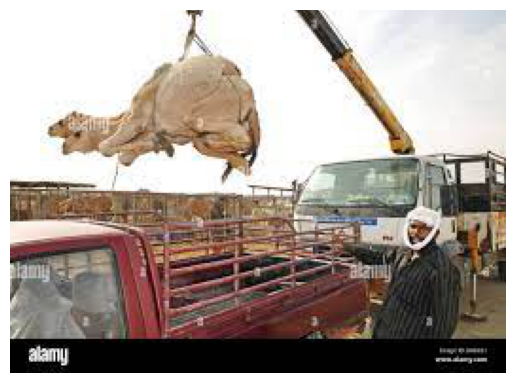

1/1 [==============================] - 0s 83ms/step
['animals', 'human', 'vehicle']


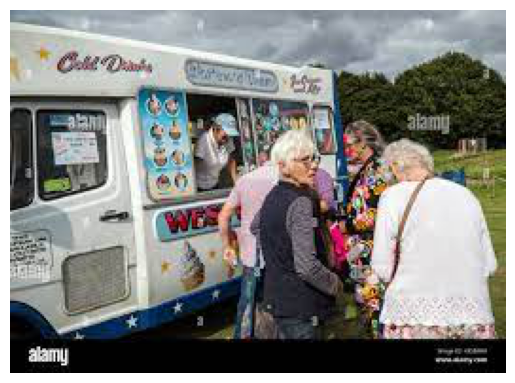

1/1 [==============================] - 0s 82ms/step
['animals', 'bridges_seas_building']


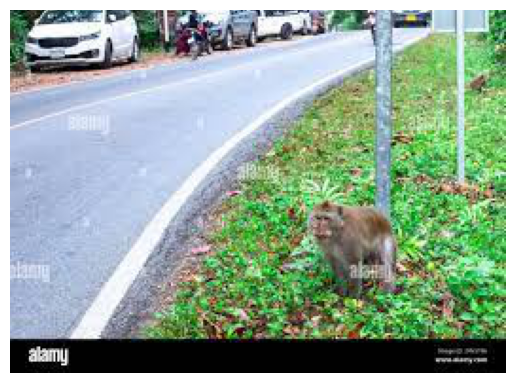

1/1 [==============================] - 0s 95ms/step
['animals', 'human', 'vehicle']


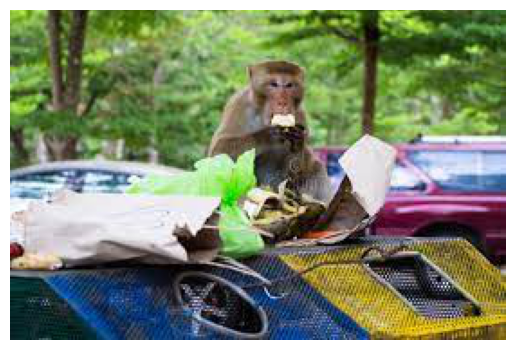

F1 Score: 0.6031746031746033
Confusion Matrix:
[[4 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

     animals       0.80      1.00      0.89         4
        food       0.00      0.00      0.00         2
       human       0.67      0.67      0.67         3
     vehicle       0.67      0.50      0.57         4

   micro avg       0.73      0.62      0.67        13
   macro avg       0.53      0.54      0.53        13
weighted avg       0.61      0.62      0.60        13
 samples avg       0.80      0.65      0.65        13



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['bridges_seas_building'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import random
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer

def class_predictor(class_names):
    image_addresses = []
    true_labels = []
    num_images = 5

    def indices_greater_1_percent(list_prediction):
        indices = []
        for i, val in enumerate(list_prediction):
            if val > .013:
                indices.append(i)
        return indices



    def locating_class(class_names, indices):
        located_elements = []
        for index in indices:
            located_elements.append(class_names[index])
        return located_elements

    print("Please enter the addresses and true labels of the images:")
    for i in range(num_images):
        image_address = input(f"Image {i+1} address: ")
        true_label_input = input(f"Image {i+1} true labels (comma-separated): ")
        true_label_list = [label.strip() for label in true_label_input.split(",")]
        image_addresses.append(image_address)
        true_labels.append(true_label_list)

    results = []

    predicted_labels = []

    for image_address, true_label_list in zip(image_addresses, true_labels):

        image_path = f"image_{random.randint(1, 100000)}.jpg"
        urllib.request.urlretrieve(image_address, image_path)

        img = tf.io.read_file(image_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, size=[224, 224])
        img = img / 255.
        plt.imshow(img)
        plt.axis("off")
        img = tf.expand_dims(img, axis=0)

        prediction = loaded_efficient_model.predict(img)
        prediction = prediction.flatten()
        list_prediction = prediction.tolist()

        indices = indices_greater_1_percent(list_prediction)

        classes = locating_class(class_names, indices)
        print(classes)


        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()

        result = (img, classes)
        results.append(result)

        predicted_labels.append(classes)

    mlb = MultiLabelBinarizer()
    true_labels_bin = mlb.fit_transform(true_labels)
    predicted_labels_bin = mlb.transform(predicted_labels)

    f1 = f1_score(true_labels_bin, predicted_labels_bin, average="weighted")
    cm = confusion_matrix(true_labels_bin.argmax(axis=1), predicted_labels_bin.argmax(axis=1))
    report = classification_report(true_labels_bin, predicted_labels_bin, target_names=mlb.classes_)

    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    return results

results = class_predictor(class_names)


In [ ]:
!pip install streamlit
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.9 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=1c6a46d6cfcd3551033995914306b0b6deaf0fe30a354909c450618f19bc3390
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [ ]:
%%writefile efficientnet.py
import streamlit as st
import tensorflow as tf
import urllib.request
import random
from sklearn.preprocessing import MultiLabelBinarizer

# Load the trained model
loaded_efficient_model = tf.keras.models.load_model("/content/drive/MyDrive/efficientnet_model")

# Get the class names
class_names = ['animals',
               'bridges_seas_building',
               'clothes',
               'flowers',
               'food',
               'forest',
               'fruits_vegetables',
               'human',
               'vehicle']

def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[224, 224])
    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    return img

def predict_labels(img):
    prediction = loaded_efficient_model.predict(img)
    prediction = prediction.flatten()
    list_prediction = prediction.tolist()

    indices = indices_greater_1_percent(list_prediction)
    classes = locating_class(class_names, indices)
    return classes

def indices_greater_1_percent(list_prediction):
    indices = []
    for i, val in enumerate(list_prediction):
        if val > .013:
            indices.append(i)
    return indices

def locating_class(class_names, indices):
    located_elements = []
    for index in indices:
        located_elements.append(class_names[index])
    return located_elements

def extract_true_labels_from_address(image_address, class_names):
    # Write your code here to extract true labels from the image address
    # You can use any method or technique to infer the labels from the address
    # Return a list of true labels

    # Replace the following line with your code to extract true labels
    return random.sample(class_names, random.randint(1, len(class_names)))

def main():
    st.title("Multilabel Image Classification")

    # Initialize results list
    results = []

    # Get user input
    num_images = st.number_input("Enter the number of images:", min_value=1, value=1, step=1)

    for i in range(num_images):
        st.markdown(f"## Image {i+1}")

        # Get image address input from the user
        image_address = st.text_input(f"Image {i+1} address:")

        if image_address:
            with st.spinner("Processing..."):
                # Download the image
                image_path = f"image_{random.randint(1, 100000)}.jpg"
                urllib.request.urlretrieve(image_address, image_path)

                # Preprocess the image
                img = preprocess_image(image_path)

                # Perform prediction
                classes = predict_labels(img)

                # Display the predicted classes
                st.subheader("Predicted Labels:")
                st.write(classes)

                # Display the uploaded image
                st.image(image_path, use_column_width=True)

                # Extract true labels from image address
                true_labels = extract_true_labels_from_address(image_address, class_names)

                # Append result to the list
                result = (image_path, classes, true_labels)
                results.append(result)

    # Show the results
    st.markdown("## Results")
    for i, result in enumerate(results):
        st.markdown(f"### Image {i+1}")
        st.markdown("#### Predicted Labels:")
        st.write(result[1])
        st.markdown("#### True Labels:")
        st.write(result[2])

if __name__ == "__main__":
    main()







Writing efficientnet.py


In [ ]:
!pip install voila streamlit




In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.125.237.47


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.581s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run efficientnet.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 5.835s
your url is: https://calm-candies-add.loca.lt
^C


In [ ]:
%%writefile efficientnet1.py
import os
import streamlit as st
import tensorflow as tf
import urllib.request
import random
import asyncio
from sklearn.preprocessing import MultiLabelBinarizer

# Load the trained model
loaded_efficient_model = tf.keras.models.load_model("/content/drive/MyDrive/efficientnet_model")

# Get the class names
class_names = ['animals',
               'bridges_seas_building',
               'clothes',
               'flowers',
               'food',
               'forest',
               'fruits_vegetables',
               'human',
               'vehicle']

def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[224, 224])
    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    return img

def predict_labels(img):
    prediction = loaded_efficient_model.predict(img)
    prediction = prediction.flatten()
    list_prediction = prediction.tolist()

    indices = indices_greater_1_percent(list_prediction)
    classes = locating_class(class_names, indices)
    return classes

def indices_greater_1_percent(list_prediction):
    indices = []
    for i, val in enumerate(list_prediction):
        if val > .013:
            indices.append(i)
    return indices

def locating_class(class_names, indices):
    located_elements = []
    for index in indices:
        located_elements.append(class_names[index])
    return located_elements

def extract_true_labels_from_address(image_address, class_names):
    # Write your code here to extract true labels from the image address
    # You can use any method or technique to infer the labels from the address
    # Return a list of true labels

    # Replace the following line with your code to extract true labels
    return random.sample(class_names, random.randint(1, len(class_names)))

async def move_images(result, class_names):
    for label in result[1]:
        label_folder = os.path.join("/content/predicted_images", label)
        os.makedirs(label_folder, exist_ok=True)
        image_name = os.path.basename(result[0])
        new_image_path = os.path.join(label_folder, image_name)
        os.rename(result[0], new_image_path)

async def process_results(results):
    tasks = [move_images(result, class_names) for result in results]
    await asyncio.gather(*tasks)

def main():
    st.title("Image Gallery Organizer")

    # Initialize results list
    results = []

    # Get user input
    num_images = st.number_input("Enter the number of images:", min_value=1, value=1, step=1)

    for i in range(num_images):
        st.markdown(f"## Image {i+1}")

        # Get image address input from the user
        image_address = st.text_input(f"Image {i+1} address:")

        if image_address:
            with st.spinner("Processing..."):
                # Download the image
                image_path = f"image_{random.randint(1, 100000)}.jpg"
                urllib.request.urlretrieve(image_address, image_path)

                # Preprocess the image
                img = preprocess_image(image_path)

                # Perform prediction
                classes = predict_labels(img)

                # Display the predicted classes
                st.subheader("Predicted Labels:")
                st.write(classes)

                # Display the uploaded image
                st.image(image_path, use_column_width=True)


                true_labels = extract_true_labels_from_address(image_address, class_names)


                result = (image_path, classes, true_labels)
                results.append(result)


    BATCH_SIZE = 10
    for i in range(0, len(results), BATCH_SIZE):
        batch_results = results[i:i+BATCH_SIZE]
        st.markdown("## Results")
        await process_results(batch_results)
        for i, result in enumerate(batch_results):
            st.markdown(f"### Image {i+1}")
            st.markdown("#### Predicted Labels:")
            st.write(result[1])
            st.markdown("#### True Labels:")
            st.write(result[2])

if __name__ == "__main__":
    asyncio.run(main())


Writing efficientnet1.py


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.247.122.110


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.297s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run efficientnet1.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501


npx: installed 22 in 3.029s
your url is: https://rare-symbols-stand.loca.lt
